# 利用热力图绘制混淆矩阵

## 混淆矩阵

混淆矩阵（Confusion Matrix）是一种在深度学习中常用的辅助工具，可以直观地了解模型在哪一类样本里面表现得不是很好。

它是一种特定的二维矩阵：

- 列代表预测的类别；行代表实际的类别
- 对角线上的值表示预测正确的数量/比例；非对角线元素是预测错误的部分

混淆矩阵的对角线值越高越好，表明许多正确的预测。

例如有一个用来对猫、狗、兔子进行分类的系统，结果混淆矩阵如下表：

||Cat|Dog|Rabbit|
|:--|:--|:--|:--|
|Cat|5|3|0|
|Dog|2|3|1|
|Rabbit|0|2|11|

在这个混淆矩阵中，实际有 8 只猫，但模型将其中的 3 只预测成了狗；对于 6 条狗，其中有一条被预测成了兔子，2 条被预测成了猫。从混淆矩阵中可以看出模型区分猫和狗存在一些问题，区分兔子和其他动物还是不错的。

## 使用 sklearn 求混淆矩阵

sklearn 提供 `confusion_matrix` 函数用于求混淆矩阵

函数原型如下：

```python
confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)
```

`y_true`：样本真实分类结果

`y_pred`：样本预测分类结果

`labels`：所给出的类别，通过这个可对类别进行选择

`sample_weight`：样本权重

In [1]:
from sklearn.metrics import confusion_matrix

y_true = [0, 1, 2, 2, 1, 0, 0, 2, 1]
y_pred = [0, 1, 1, 2, 1, 0, 1, 2, 0]

cm = confusion_matrix(y_true, y_pred)

print(cm)

[[2 1 0]
 [1 2 0]
 [0 1 2]]


若指定类别为 `[0, 1, 2, 3]`，由于 `y_true` 和 `y_pred` 中没有有关类别 3 的数据，求得的混淆矩阵会多一行一列的 0

In [2]:
cm2 = confusion_matrix(y_true, y_pred, labels=[0, 1, 2, 3])

print(cm2)

[[2 1 0 0]
 [1 2 0 0]
 [0 1 2 0]
 [0 0 0 0]]


若指定类别为 `[0, 1]`，则只针对 0 和 1 两个类别求混淆矩阵，`y_true` 和 `y_pred` 中有关类别 2 的数据不会被计算

In [3]:
cm3 = confusion_matrix(y_true, y_pred, labels=[0, 1])

print(cm3)

[[2 1]
 [1 2]]


## Seaborn 热力图

### heatmap 函数

Seaborn 中有绘制热力图的函数 `heatmap`，其原型如下：

```python
seaborn.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
```

`data`：矩阵数据集，可以是 `numpy.ndarray`，也可以是 `pandas.DataFrame`。如果是 `DataFrame`，其 `index`/`column` 信息会分别对应到 heatmap 的 `columns` 和 `rows`

`cmap`：从数字到色彩空间的映射，取值为 `matplotlib.colormap` 的名称或颜色对象，或者表示颜色的列表

`annot`(annotate 的缩写)：默认值 False；如果是 True，在热力图每个方格写入数据；如果是矩阵，在热力图每个方格写入该矩阵对应位置数据

`fmt`：字符串格式代码，矩阵上标识数字的数据格式

`annot_kws`：默认取值 False；如果是 True，设置热力图矩阵上数字的大小颜色字体，matplotlib 包 text 类下的字体设置

`linewidths`：定义热力图里“表示两两特征关系的矩阵小块”之间的间隔大小

`linecolor`：切分热力图上每个矩阵小块的线的颜色，默认值是 `white`

`cbar`：是否在热力图侧边绘制颜色刻度条，默认值是 True

`cbar_kws`：热力图侧边绘制颜色刻度条时，相关字体设置，默认值是 None

`cbar_ax`：热力图侧边绘制颜色刻度条时，刻度条位置设置，默认值是 None

`xticklabels`，`yticklabels`：`xticklabels` 控制每列标签名的输出；`yticklabels` 控制每行标签名的输出。默认值是 auto。如果是 True，则以 DataFrame 的列名作为标签名。如果是 False，则不添加行标签名。如果是列表，则标签名改为列表中给的内容。如果是整数 $K$，则在图上每隔 $K$ 个标签进行一次标注。如果是 auto，则自动选择标签的标注间距，将标签名不重叠的部分(或全部)输出

`ax`：设置作图的坐标轴，一般画多个子图时需要修改不同的子图的该值

### 简单热力图绘制

以上面的混淆矩阵为例

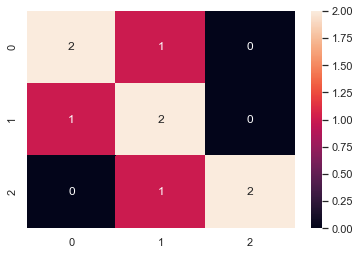

In [5]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_true = [0, 1, 2, 2, 1, 0, 0, 2, 1]
y_pred = [0, 1, 1, 2, 1, 0, 1, 2, 0]

cm = confusion_matrix(y_true, y_pred)

sns.set()
fig, ax = plt.subplots()
sns.heatmap(cm, ax=ax, annot=True)
plt.show()

### 添加刻度

以猫、狗和兔子分类的混淆矩阵为例

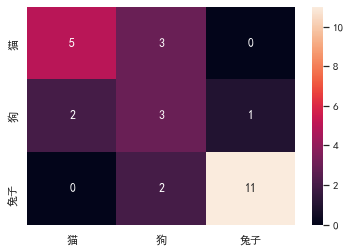

In [6]:
ticks = ['猫', '狗', '兔子']

cm = [[5, 3, 0], [2, 3, 1], [0, 2, 11]]

# 刻度含有中文，需要在初始化时指定字体
sns.set(font='SimHei')

fig, ax = plt.subplots()

sns.heatmap(cm, ax=ax, annot=True, xticklabels=ticks, yticklabels=ticks)

plt.show()

此处刻度的字体偏小，可以使用 `ax.tick_params` 函数调整

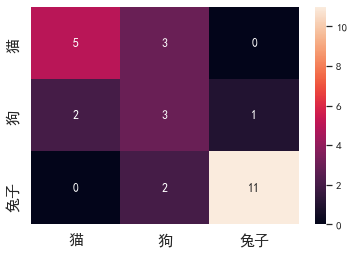

In [9]:
ticks = ['猫', '狗', '兔子']

cm = [[5, 3, 0], [2, 3, 1], [0, 2, 11]]

sns.set(font='SimHei')

fig, ax = plt.subplots()
ax.tick_params(labelsize=15)

sns.heatmap(cm, ax=ax, annot=True, xticklabels=ticks, yticklabels=ticks)

plt.show()

### 热力图大小

若矩阵行数列数较大，可以适当扩大图像的大小，通过指定 `plt.subplots` 函数的 `figsize` 参数来设置图像大小

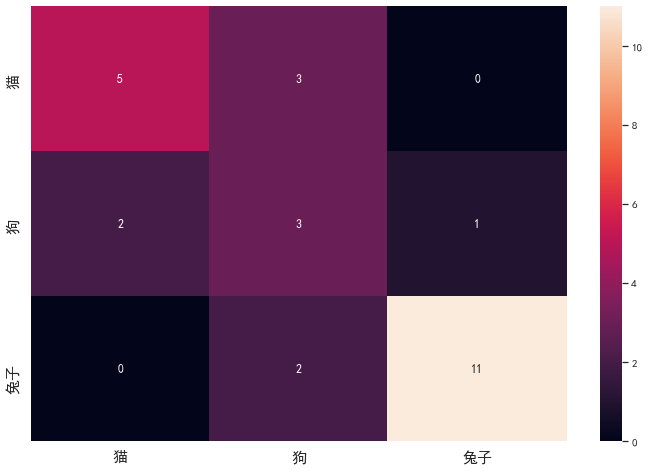

In [10]:
ticks = ['猫', '狗', '兔子']

cm = [[5, 3, 0], [2, 3, 1], [0, 2, 11]]

sns.set(font='SimHei')

fig, ax = plt.subplots(figsize=(12, 8))
ax.tick_params(labelsize=15)

sns.heatmap(cm, ax=ax, annot=True, xticklabels=ticks, yticklabels=ticks)

plt.show()